In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests 
import json
import datetime  
%matplotlib inline

# Part 1: Data scraping and preparation

# Step 1: Scrape your competitor's data 

In [2]:
url1 = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'
response = requests.get( url1 )
html_raw = response.text
html_soup = BeautifulSoup( html_raw, 'html.parser' )

In [3]:
soup = html_soup.prettify().encode('utf-8')

In [4]:
table_of_contents = html_soup.findAll('table', class_='table')
len(table_of_contents)

4

In [5]:
contents = table_of_contents[0].find_all('td')

In [6]:
table = pd.DataFrame()

In [7]:
a = [ i.text for i in contents ]

for i in range( 8 ):
    table[i] = a[i::8]

In [8]:
table.rename( 
    columns = {
        0: 'rank',
        1: 'x_classification',
        2: 'date',
        3: 'region',
        4: 'start_time',
        5: 'maximum_time',
        6: 'end_time',
        7: 'movie'
    }, 
    inplace = True
)

# Step 2: Tidy the top 50 solar flare data

In [9]:
table.drop( columns=['movie'], inplace=True )

In [10]:
table.head()

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


for i, r in table.iterrows():
    r.start_time = pd.to_datetime( r.date + ' ' + r.start_time )
    r.maximum_time = pd.to_datetime( r.date + ' ' + r.maximum_time )
    r.end_time = pd.to_datetime( r.date + ' ' + r.end_time )

In [11]:
st, mt, et = [], [], []
for i, r in table.iterrows():
    st.append( pd.to_datetime( r.date + ' ' +   r.start_time ) )
    mt.append( pd.to_datetime( r.date   + ' ' +   r.maximum_time ) )
    et.append( pd.to_datetime( r.date  + ' ' + r.end_time ) )
    
table['Start_Date_Time'] = st
table['End_Date_Time'] = et
table['MAX_Date_Time'] = mt

In [12]:
table.drop(
    columns = ['date', 'start_time', 'maximum_time', 'end_time'],
    inplace = True
)

In [13]:
table

,rank,x_classification,region,Start_Date_Time,End_Date_Time,MAX_Date_Time
0,1,X28+,0486,2003-11-04 19:29:00,2003-11-04 20:06:00,2003-11-04 19:53:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 22:03:00,2001-04-02 21:51:00
2,3,X17.2+,0486,2003-10-28 09:51:00,2003-10-28 11:24:00,2003-10-28 11:10:00
3,4,X17+,0808,2005-09-07 17:17:00,2005-09-07 18:03:00,2005-09-07 17:40:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:55:00,2001-04-15 13:50:00
5,6,X10,0486,2003-10-29 20:37:00,2003-10-29 21:01:00,2003-10-29 20:49:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 12:01:00,1997-11-06 11:55:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:10:00,2017-09-06 12:02:00
8,9,X9,0930,2006-12-05 10:18:00,2006-12-05 10:45:00,2006-12-05 10:35:00
9,10,X8.3,0486,2003-11-02 17:03:00,2003-11-02 17:39:00,2003-11-02 17:25:00


## NaN values in each column
    - 

In [14]:
table.isna().sum()

rank                0
x_classification    0
region              0
Start_Date_Time     0
End_Date_Time       0
MAX_Date_Time       0
dtype: int64

# Step 3: Scrape the NASA data

In [15]:
nasa_url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'

In [16]:
response = requests.get( nasa_url )
html_raw = response.text
html_soup = BeautifulSoup( html_raw, 'html.parser' )

In [17]:
table_of_contents = html_soup.findAll( 'pre' )
len( table_of_contents )

1

In [18]:
type( table_of_contents )

bs4.element.ResultSet

In [19]:
contents = table_of_contents[0].get_text()

In [20]:
content = contents.split( '\n' )[12:-3]

In [21]:
data = []
for i, x in enumerate( content ):
    data.append( [xi for xi in x.split(' ') if xi is not ''] )

In [22]:
NASA = pd.DataFrame( data ).drop( columns= [ i for i in range( 15, 24 ) ] )

In [23]:
NASA.reset_index( drop=True, inplace=True )
NASA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2017/07/23,05:27,07/23,06:12,4400,900,BACK,-----,----,07/23,04:48,Halo,360,1848,PHTX
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418,PHTX
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571,PHTX
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163,PHTX


In [24]:
NASA.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517
unique,465,328,270,292,51,91,425,245,185,267,249,142,156,433,1
top,2000/11/24,00:00,11/03,24:00,14000,1000,BACK,-----,----,--/--,--:--,Halo,360,----,PHTX
freq,3,8,8,14,216,34,24,93,113,22,22,285,284,22,517


In [25]:
columns = [ 'Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'Start_Frequency', 
            'End_Frequency', 'Flare_Location', 'Flare_Region','Importance',
           'CME_Date', 'XME_Time', 'CPA', 'CME_Width', 'CME_Speed', 'PHTX'
          ]
NASA.columns = columns

# Step 4: Tidy the NASA table

## Extract unique values and view missy nodes.

In [26]:
np.unique( NASA ) #.tolist()

array(['---', '----', '-----', ..., 'X9.3', 'X9.4', 'altr'], dtype=object)

## Check null values

In [27]:
NASA.isna().sum()

Start_Date         0
Start_Time         0
End_Date           0
End_Time           0
Start_Frequency    0
End_Frequency      0
Flare_Location     0
Flare_Region       0
Importance         0
CME_Date           0
XME_Time           0
CPA                0
CME_Width          0
CME_Speed          0
PHTX               0
dtype: int64

## Convert Values like ['---', '----', '-----', '...', '--/--', '--:--', '????'] to NaN

In [28]:
for col in NASA.columns:
    NASA[col].replace( [ '---', '----', '-----', '...', '--/--', '--:--', '????'], np.nan, inplace=True)

In [29]:
NASA.isna().sum()

Start_Date           0
Start_Time           0
End_Date             0
End_Time             0
Start_Frequency      4
End_Frequency        4
Flare_Location       0
Flare_Region        93
Importance         113
CME_Date            22
XME_Time            22
CPA                 22
CME_Width           22
CME_Speed           22
PHTX                 0
dtype: int64

## Is CPA Halo ?
    - if CPA cell == halo --> True else False
    - convert to halo in CPA to nan

In [30]:
NASA['IS_CPA_Halo'] = NASA.CPA.map( lambda i: i == 'Halo' )

In [31]:
NASA.CPA.replace( 'Halo', 'NA', inplace=True )

##  width column indicates if the given value is a lower bound

In [32]:
 NASA['width_lower_bound'] = NASA['CME_Width'].map( lambda i: str(i)[0] == '>' )

## remove any non-numeric part of the width column.

In [33]:
def is_int(i):
    try:
        int(i)
        return True
    except ValueError:
        return False

In [34]:
NASA['CME_Width'] = NASA['CME_Width'].map( lambda i: i if is_int(i) else "" )

## drop duplicates
    - no duplicated data here

## Drop nan values ( CANCELLED to not loss ranks )
    - data shape (517, 12)
    - data shape after drop (377, 12)
    - after remove halo word: (163, 12)

## Datatime
    -  Drop only if NaN in XME_Time column () (CANCELLED) USE FILLNA instead
    -  CME_Date has same values as in Start_Date so:
        - CME_Date has 22 NaN value and XME_Time has
        - complete CME_Date missing values by using Start_Date values
    - Convert 24:00 to 00:00

In [35]:
NASA

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,XME_Time,CPA,CME_Width,CME_Speed,PHTX,IS_CPA_Halo,width_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,PHTX,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,PHTX,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2017/07/23,05:27,07/23,06:12,4400,900,BACK,NaN,NaN,07/23,04:48,NA,360,1848,PHTX,True,False
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,NA,360,1418,PHTX,True,False
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,NA,360,1571,PHTX,True,False
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,NaN,X8.3,09/10,16:00,NA,360,3163,PHTX,True,False


In [36]:
NASA.CME_Date.fillna( 
    NASA.End_Date,
    inplace = True
)

# Drop only if NaN in XME_Time column
"""
# if I drop here I will loss X_ Importance data
NASA.dropna( 
    subset = ['XME_Time'],
    inplace = True
)
NASA.head()
"""
NASA.XME_Time.fillna( 
    NASA.Start_Time,
    inplace = True
)

In [37]:
a, b = [], []

for i, r in NASA.iterrows():
    if len( r.End_Date.split('/') ) is 2:
        a.append( '/'.join( [r.Start_Date.split('/')[0]] + r.End_Date.split('/') ) )
        
    if len( str(r.CME_Date).split('/') ) is 2:
        b.append( '/'.join( [r.Start_Date.split('/')[0]] + str(r.CME_Date).split('/') ) )

NASA.End_Date, NASA.CME_Date = a, b

In [38]:
st, mt, et = [], [], []
for i, r in NASA.iterrows():
    # Combine the date column with the time columns to convert to datetime format
    st.append( pd.to_datetime( r.Start_Date + ' ' +   r.Start_Time ) )
    mt.append( pd.to_datetime( r.CME_Date   + ' ' +   r.XME_Time ) )
    #print(i)
    
    end_time = r.End_Time.split(':')
    if int( end_time[0] ) is 24:
        end_time[0] = '00' 
        
    end_time = str( ':'.join( end_time ) )
    et.append( pd.to_datetime( str(r.End_Date)  + ' ' + str(end_time ) ) )
    
NASA['Start_Date_Time'] = st
NASA['End_Date_Time'] = et
NASA['MAX_Date_Time'] = mt

# Drop the unneeded columns
NASA.drop( columns = ['Start_Date', 'CME_Date', 'End_Date', 'Start_Time', 'XME_Time', 'End_Time'], inplace=True )

# PART TWO: Data Analysis 



In [39]:
NASA

,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CPA,CME_Width,CME_Speed,PHTX,IS_CPA_Halo,width_lower_bound,Start_Date_Time,End_Date_Time,MAX_Date_Time
0,8000,4000,S25E16,8026,M1.3,74,79,312,PHTX,False,False,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00
1,11000,1000,S28E19,8027,C6.8,NA,360,878,PHTX,True,False,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00
2,12000,80,N21W08,8038,C1.3,NA,360,464,PHTX,True,False,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00
3,5000,500,N05W12,8040,M1.3,263,165,296,PHTX,False,False,1997-05-21 20:20:00,1997-05-21 22:00:00,1997-05-21 21:00:00
4,6000,2000,S29E25,8088,C1.4,133,155,712,PHTX,False,False,1997-09-23 21:53:00,1997-09-23 22:16:00,1997-09-23 22:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4400,900,BACK,NaN,NaN,NA,360,1848,PHTX,True,False,2017-07-23 05:27:00,2017-07-23 06:12:00,2017-07-23 04:48:00
513,14000,210,S10W12,12673,M5.5,NA,360,1418,PHTX,True,False,2017-09-04 20:27:00,2017-09-05 04:54:00,2017-09-04 20:12:00
514,16000,70,S08W33,12673,X9.3,NA,360,1571,PHTX,True,False,2017-09-06 12:05:00,2017-09-07 08:00:00,2017-09-06 12:24:00
515,16000,150,S09W92,NaN,X8.3,NA,360,3163,PHTX,True,False,2017-09-10 16:02:00,2017-09-11 06:50:00,2017-09-10 16:00:00


In [40]:
table.head()

,rank,x_classification,region,Start_Date_Time,End_Date_Time,MAX_Date_Time
0,1,X28+,0486,2003-11-04 19:29:00,2003-11-04 20:06:00,2003-11-04 19:53:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 22:03:00,2001-04-02 21:51:00
2,3,X17.2+,0486,2003-10-28 09:51:00,2003-10-28 11:24:00,2003-10-28 11:10:00
3,4,X17+,0808,2005-09-07 17:17:00,2005-09-07 18:03:00,2005-09-07 17:40:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:55:00,2001-04-15 13:50:00


## Question 1: Replication
    - Can you replicate the top 50 solar flare table inSpaceWeatherLive.com
        exactly using the data obtained from NASA? That is, 
        if you get the top 50 solar flares from the NASA table based on their classification 
            (e.g., X28 isthe highest), 
        do you get data for the same solar flare events?
        
        Include code used to get the top 50 solar flares from the NASA table 
            (be careful when ordering by classification).
        Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

    - Deal with NASA.Importance NaN by convert to ''

In [41]:
NASA['Importance'].fillna( '', inplace=True )

    - Importance in NASA  <----->  x_classification in table
    - Select X__ in Importance
    - remove X character and convert to float
    - sort data ~~ Importance ---> descending 

In [42]:
top_50_data = NASA.copy()
top_50_data = top_50_data.loc[ top_50_data['Importance'].str.contains('X') ]

In [43]:
# remove X character and convert to float
top_50_data['Importance'] = top_50_data['Importance'].map( lambda x: float( str(x)[1:] ) )

In [44]:
# sort data ~~ Importance ---> descending 
top_50_data.sort_values( 'Importance', ascending = False, inplace=True )

In [45]:
# Re-add X and convert to string
top_50_data['Importance'] = top_50_data['Importance'].map( lambda x: f'X{str(x)}' )

In [46]:
top_50_data.index

Int64Index([240, 117, 233, 126, 234,   8, 514, 328, 237, 515, 288, 359, 331,
            317,  82, 121, 375, 135, 443, 193, 104, 239, 286, 222, 332, 160,
            192, 404, 201, 403, 487,  19, 238, 284, 142,   9, 276, 123,  99,
             73, 345, 318, 361, 420,   7,  98, 125, 274, 285, 102, 189, 100,
             49, 402, 373, 281, 115, 316, 149, 150, 467, 178, 217, 320, 333,
            457, 390, 362, 306, 287, 152, 221, 226, 405,  55, 439, 232, 118,
             14, 300, 223, 231, 388, 374,  46, 116,  18, 153, 428, 196,  80,
             16],
           dtype='int64')

     - display the top 50 classifications side by side

In [47]:
top_side_by_side = pd.DataFrame(
    {
        
        'rank': table['rank'].tolist(),
        'table.x_classification': table.x_classification.tolist(),
        'top_50_data.Importance': top_50_data.Importance.tolist()[0:50],
        'top_50_data.index': top_50_data.index.tolist()[0:50]
    }
)

In [48]:
top_side_by_side.head()

,rank,table.x_classification,top_50_data.Importance,top_50_data.index
0,1,X28+,X28.0,240
1,2,X20+,X20.0,117
2,3,X17.2+,X17.0,233
3,4,X17+,X14.0,126
4,5,X14.4,X10.0,234


## Question 2: Integration
    - Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data.
        Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data 
            for each of the top 50 solar flares.
        In your submission, include an explanation of how you are defining the best matching rows 
            across the two datasets in addition to the code used to find the best matches. 
        Finally, useyour function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, 
            if it appears in that dataset.

    - Use merge on specific columns to get best match

In [49]:
def Best_match( merge_cols = [ 'x_classification'] ):
    NASA.reset_index( drop=True, inplace=True ) # reset index
    df = NASA.copy() 
    df1 = NASA.copy()
    nasa = NASA.copy()
    
    df1['nasa_index'] = df1.index
    df1.rename(  columns = { 'Flare_Region': 'region' , 'Importance': 'x_classification'}, inplace=True )
    df1.drop( columns = ['Start_Frequency','End_Frequency','Flare_Location','CPA','CME_Width','CME_Speed','PHTX','IS_CPA_Halo','width_lower_bound'], inplace=True )

    df2 = table.copy()
    # best_matching dataframe
    df = pd.merge( 
        df1, 
        df2, 
        on = merge_cols, # left_on='Importance', right_on='x_classification',
        how='inner'
    )
    #"""
    nasa['rank_'] = np.nan
    for i, r in df.iterrows():
        #pass
        #print( r['nasa_index'] )
        nasa.iat[ r['nasa_index'], -1] = r['rank']
        #print(  r.rank )
        #print( r.nasa_index )
    #"""
    return  nasa, df

In [50]:
best_matching, merged = Best_match()

In [51]:
merged

,region_x,x_classification,Start_Date_Time_x,End_Date_Time_x,MAX_Date_Time_x,nasa_index,rank,region_y,Start_Date_Time_y,End_Date_Time_y,MAX_Date_Time_y
0,8100,X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,1997-11-06 12:10:00,8,7,8100,1997-11-06 11:49:00,1997-11-06 12:01:00,1997-11-06 11:55:00
1,8113,X2.6,1997-11-27 13:30:00,1997-11-27 14:00:00,1997-11-27 13:56:00,9,49,0720,2005-01-15 22:25:00,2005-01-15 23:31:00,2005-01-15 23:02:00
2,8113,X2.6,1997-11-27 13:30:00,1997-11-27 14:00:00,1997-11-27 13:56:00,9,50,9632,2001-09-24 09:32:00,2001-09-24 11:09:00,2001-09-24 10:38:00
3,9632,X2.6,2001-09-24 10:45:00,2001-09-25 20:00:00,2001-09-24 10:30:00,142,49,0720,2005-01-15 22:25:00,2005-01-15 23:31:00,2005-01-15 23:02:00
4,9632,X2.6,2001-09-24 10:45:00,2001-09-25 20:00:00,2001-09-24 10:30:00,142,50,9632,2001-09-24 09:32:00,2001-09-24 11:09:00,2001-09-24 10:38:00
5,10720,X2.6,2005-01-15 23:00:00,2005-01-17 00:00:00,2005-01-15 23:06:00,284,49,0720,2005-01-15 22:25:00,2005-01-15 23:31:00,2005-01-15 23:02:00
6,10720,X2.6,2005-01-15 23:00:00,2005-01-17 00:00:00,2005-01-15 23:06:00,284,50,9632,2001-09-24 09:32:00,2001-09-24 11:09:00,2001-09-24 10:38:00
7,8210,X2.7,1998-05-06 08:25:00,1998-05-06 08:35:00,1998-05-06 08:29:00,19,46,2339,2015-05-05 22:05:00,2015-05-05 22:15:00,2015-05-05 22:11:00
8,8210,X2.7,1998-05-06 08:25:00,1998-05-06 08:35:00,1998-05-06 08:29:00,19,47,0488,2003-11-03 01:09:00,2003-11-03 01:45:00,2003-11-03 01:30:00
9,8210,X2.7,1998-05-06 08:25:00,1998-05-06 08:35:00,1998-05-06 08:29:00,19,48,8210,1998-05-06 07:58:00,1998-05-06 08:20:00,1998-05-06 08:09:00


In [52]:
best_matching

,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CPA,CME_Width,CME_Speed,PHTX,IS_CPA_Halo,width_lower_bound,Start_Date_Time,End_Date_Time,MAX_Date_Time,rank_
0,8000,4000,S25E16,8026,M1.3,74,79,312,PHTX,False,False,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00,NaN
1,11000,1000,S28E19,8027,C6.8,NA,360,878,PHTX,True,False,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00,NaN
2,12000,80,N21W08,8038,C1.3,NA,360,464,PHTX,True,False,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00,NaN
3,5000,500,N05W12,8040,M1.3,263,165,296,PHTX,False,False,1997-05-21 20:20:00,1997-05-21 22:00:00,1997-05-21 21:00:00,NaN
4,6000,2000,S29E25,8088,C1.4,133,155,712,PHTX,False,False,1997-09-23 21:53:00,1997-09-23 22:16:00,1997-09-23 22:02:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4400,900,BACK,NaN,,NA,360,1848,PHTX,True,False,2017-07-23 05:27:00,2017-07-23 06:12:00,2017-07-23 04:48:00,NaN
513,14000,210,S10W12,12673,M5.5,NA,360,1418,PHTX,True,False,2017-09-04 20:27:00,2017-09-05 04:54:00,2017-09-04 20:12:00,NaN
514,16000,70,S08W33,12673,X9.3,NA,360,1571,PHTX,True,False,2017-09-06 12:05:00,2017-09-07 08:00:00,2017-09-06 12:24:00,8.0
515,16000,150,S09W92,NaN,X8.3,NA,360,3163,PHTX,True,False,2017-09-10 16:02:00,2017-09-11 06:50:00,2017-09-10 16:00:00,10.0


## Question 3: Analysis

     - Here I droped nan values to make plots clearly

In [53]:
#NASA['Start_Frequency'].fillna('ffill', inplace=True)
NASA.dropna( inplace = True )
top_50_data.dropna( inplace = True )


top_50_data.columns.tolist()

['Start_Frequency',
 'End_Frequency',
 'Flare_Location',
 'Flare_Region',
 'Importance',
 'CPA',
 'CME_Width',
 'CME_Speed',
 'PHTX',
 'IS_CPA_Halo',
 'width_lower_bound',
 'Start_Date_Time',
 'End_Date_Time',
 'MAX_Date_Time']

    - Plot for NASA and its top 50 data show that top 50's Flare_Location always go with LOWER values of CME_Width

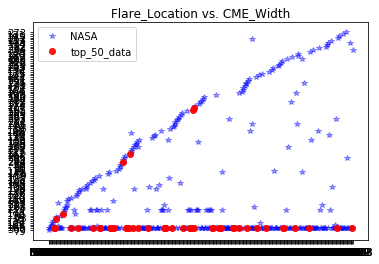

In [55]:
plt.plot( NASA.Flare_Location.values, NASA.CME_Width.values, '*', c='b', alpha=0.4, label='NASA')
plt.plot( top_50_data.Flare_Location.values[:50], top_50_data.CME_Width.values[:50], 'o', c='r',  alpha=0.9, label='top_50_data')
plt.title( 'Flare_Location vs. CME_Width' )
plt.legend()
plt.show()

    - Plot for NASA and its top 50 data show that top 50's Flare_Location always go with HIGHER values of CME_Width

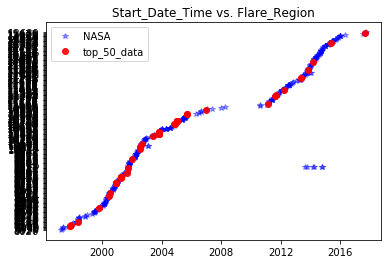

In [56]:
plt.plot( NASA.Start_Date_Time.values, NASA.Flare_Region.values, '*', c='b', alpha=0.4, label='NASA')
plt.plot( top_50_data.Start_Date_Time.values[:50], top_50_data.Flare_Region.values[:50], 'o', c='r',  alpha=0.9, label='top_50_data')
plt.title( 'Start_Date_Time vs. Flare_Region' )
plt.legend()
plt.show()

    - show how many halo values in both NASA data and its top_50_data

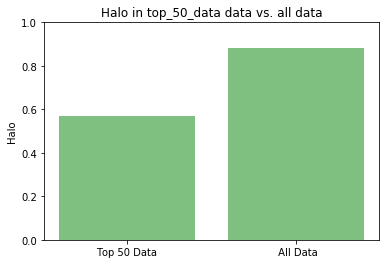

In [57]:
plt.bar( 
    [ 1, 2 ],
    [ 
        np.average( NASA['IS_CPA_Halo'] ),
        np.average( top_50_data['IS_CPA_Halo'][:50] )
    ],
    align = 'center',
    color = 'g',
    alpha = 0.5
)
bar_labels = ['Top 50 Data', ' All Data']
plt.xticks( [1,2], bar_labels )
plt.ylabel('Halo')
plt.title('Halo in top_50_data data vs. all data')
plt.ylim( 0, 1 )
plt.show()